# Combinacions encanteris

**NOTA:** Moltes de les funcions que s'utilitzen estan en el document **Combinacions_encanteris.py**

In [2]:
# Importar llibreries necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from Dades_Individuals import *
from Combinacions_encanteris import *

In [3]:
DataSet = pd.read_csv("../../LOL - Dataset/games.csv")
DataSet_champions = carregar_herois_cache()
DataSet_Sum = carregar_encanteris_cache()

# Primer mirem quines són totalment identiques
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
num_duplicated_rows = len(duplicated_rows)

# Si n'hi ha, les eliminem
DataSet_cleaned = DataSet.drop_duplicates()
DataSet_cleaned

🚀 Carregant JSON per PRIMERA vegada...
🚀 Carregant JSON per PRIMERA vegada...


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


Com s'ha comentant en el NoteBook de **Combinacions_herois**, s'eliminarà les columnes *'creationTime', 'gameDuration', 'seasonId'*, ja que són columnes que en aquest cas no tenen relació, entre els diferents encateris que es fan ús

In [4]:
columnes_a_eliminar = [
    'creationTime', 'gameDuration', 'seasonId'
]

DataSet_encanteris = DataSet_cleaned.drop(columnes_a_eliminar, axis=1)
print(f"Columnes eliminades correctament")
print(f"Columnes restants: {list(DataSet_encanteris.columns)}")
print(f"Dimensions del dataset: {DataSet_encanteris.shape}")
DataSet_encanteris.head(5)

Columnes eliminades correctament
Columnes restants: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
Dimensions del dataset:

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1,2,1,1,1,1,2,8,12,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1,1,1,1,0,1,1,119,7,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1,2,1,1,1,2,0,18,4,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1,1,1,1,1,1,0,57,4,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1,2,1,1,1,1,0,19,4,...,3,0,0,1,0,86,11,201,122,18


## Preparació dades
Com en el cas dels herois/campions, també fem ús de la funció **comptar_combinacions_encanteris** per poder adjuntar totes les combinacions possibles d'encanteris que s'utilitzen en les diferents partides.

In [5]:
# Executar la funció amb mode verbose per veure què detecta
combinacions_encanteris = comptar_combinacions_encanteris(DataSet_cleaned, verbose=True)

combinacions_encanteris_list = list(combinacions_encanteris.keys())
combinacions_encanteris_df = pd.DataFrame(combinacions_encanteris_list, columns=['sum1', 'sum2'])
combinacions_encanteris_df

combinacions_encanteris_df['spell_index'] = range(len(combinacions_encanteris_df))


Detectades 10 campeons amb encanteris.
  t1, campeó 1: {'1': 't1_champ1_sum1', '2': 't1_champ1_sum2'}
  t1, campeó 2: {'1': 't1_champ2_sum1', '2': 't1_champ2_sum2'}
  t1, campeó 3: {'1': 't1_champ3_sum1', '2': 't1_champ3_sum2'}
  t1, campeó 4: {'1': 't1_champ4_sum1', '2': 't1_champ4_sum2'}
  t1, campeó 5: {'1': 't1_champ5_sum1', '2': 't1_champ5_sum2'}
Total de combinacions úniques trobades: 36


A continuació juntem aquestes noves dades amb el dataset

In [6]:
# Aplicar la funció completa
DataSet_reduit = afegir_combinacions_encanteris_a_dataset(
    df=DataSet_encanteris,
    combinacions_encanteris_df=combinacions_encanteris_df,
)

print(f"Dimensions del dataset reduït: {DataSet_reduit.shape}")
print(f"Columnes reduïdes: {list(DataSet_reduit.columns)}")

Dimensions del dataset reduït: (51053, 48)
Columnes reduïdes: ['gameId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5', 't1_champ1_spell_index', 't1_champ2_spell_index', 't1_champ3_spell_index', 't1_champ4_spell_index', 't1_champ5_spell_index', 't2_champ1_spell_index', 't2_champ2_spell_index', 't2_champ3_spell_index', 't2_champ4_spell_index', 't2_champ5_spell_index']


In [7]:
# Mostrar les primeres files
DataSet_reduit.head()

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ2id,...,t1_champ1_spell_index,t1_champ2_spell_index,t1_champ3_spell_index,t1_champ4_spell_index,t1_champ5_spell_index,t2_champ1_spell_index,t2_champ2_spell_index,t2_champ3_spell_index,t2_champ4_spell_index,t2_champ5_spell_index
0,3326086514,1,2,1,1,1,1,2,8,432,...,3,0,6,1,4,5,6,2,4,0
1,3229566029,1,1,1,1,0,1,1,119,39,...,6,3,0,4,5,3,4,5,4,6
2,3327363504,1,2,1,1,1,2,0,18,141,...,6,5,0,3,3,6,4,3,5,6
3,3326856598,1,1,1,1,1,1,0,57,63,...,3,4,6,7,5,4,5,0,4,6
4,3330080762,1,2,1,1,1,1,0,19,29,...,3,5,0,6,6,0,3,5,3,6


## Encanteris Indiviudals

Per obtenir una vista més global sobre l'ús dels encanteris en les partides, la millor manera serà veurels individualment, com quin és el que més s'utilitza.

📊 ENCANTAMENTS INDIVIDUALS MÉS UTILITZATS

Total d'encantaments únics: 9
Total d'usos d'encantaments: 1021060

Rang   Nom de l'encantament ID     Usos       %       
----------------------------------------------------------------------
1      Flash                4      499860      48.96%
2      Teleport             12     108452      10.62%
3      Heal                 7      107133      10.49%
4      Smite                11     102183      10.01%
5      Ignite               14     87504        8.57%
6      Exhaust              3      83886        8.22%
7      Barrier              21     14747        1.44%
8      Ghost                6      14183        1.39%
9      Cleanse              1      3112         0.30%


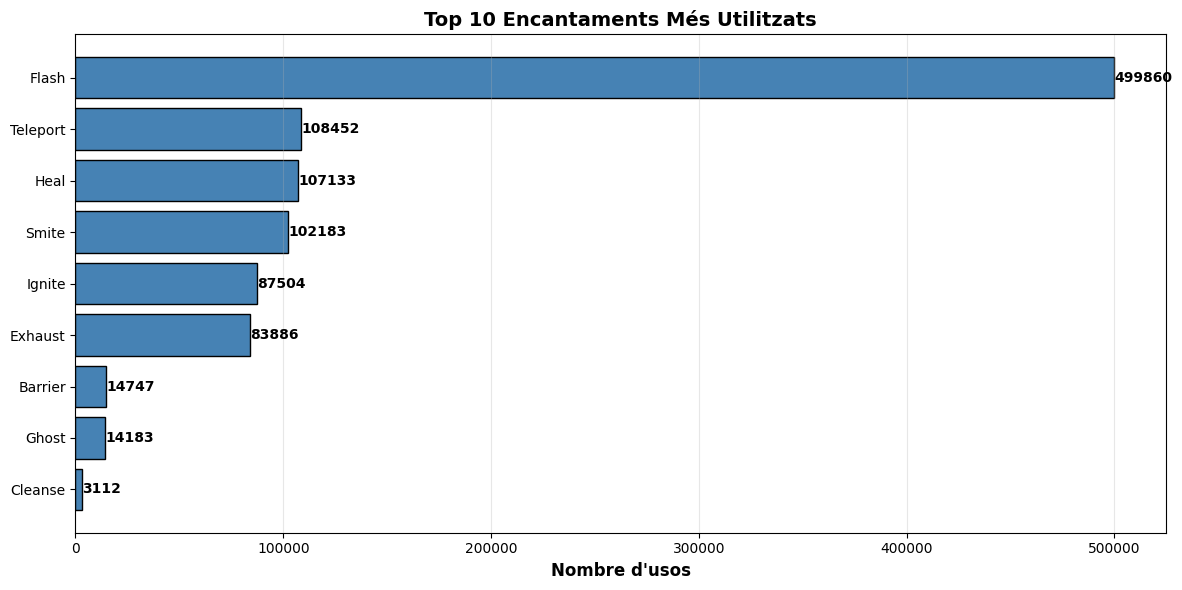


📈 ESTADÍSTIQUES ADDICIONALS
Ús mig d'encantament: 113451.11
Ús medià: 87504.00
Ús máxim: 499860
Ús mínim: 3112
Desviació estàndard: 142525.80


In [8]:
from collections import Counter
import json

# Carregat el fitxer JSON amb la informació dels encantaments
spell_info = DataSet_Sum.copy()

# Crear un diccionari que mapeja ID a nom de l'encantament
spell_id_to_name = {}
for spell_id, spell_data in spell_info['data'].items():
    spell_id_to_name[int(spell_id)] = spell_data['name']

def get_spell_name(spell_id):
    """Retorna el nom de l'encantament donada la seva ID"""
    return spell_id_to_name.get(int(spell_id), f"Unknown({spell_id})")

# Recopilar tots els encantaments
all_spells = []
for team in [1, 2]:
    for champ in range(1, 6):
        all_spells.extend(DataSet_cleaned[f't{team}_champ{champ}_sum1'].dropna().tolist())
        all_spells.extend(DataSet_cleaned[f't{team}_champ{champ}_sum2'].dropna().tolist())

spell_counts = Counter(all_spells)

print("="*70)
print("📊 ENCANTAMENTS INDIVIDUALS MÉS UTILITZATS")
print("="*70)
print(f"\nTotal d'encantaments únics: {len(spell_counts)}")
print(f"Total d'usos d'encantaments: {sum(spell_counts.values())}\n")

# Mostrar els top 10 amb noms
top_spells = spell_counts.most_common(10)
header = f"{'Rang':<6} {'Nom de l' + chr(39) + 'encantament':<20} {'ID':<6} {'Usos':<10} {'%':<8}"
print(header)
print("-"*70)

total_uses = sum(spell_counts.values())
for idx, (spell_id, count) in enumerate(top_spells, 1):
    spell_name = get_spell_name(spell_id)
    percentage = (count / total_uses) * 100
    print(f"{idx:<6} {spell_name:<20} {spell_id:<6} {count:<10} {percentage:6.2f}%")

# Gràfic: Top 10 encantaments amb noms
fig, ax = plt.subplots(figsize=(12, 6))

spell_names = [get_spell_name(spell_id) for spell_id, _ in top_spells]
spell_uses = [count for _, count in top_spells]

ax.barh(spell_names, spell_uses, color='steelblue', edgecolor='black')
ax.set_xlabel('Nombre d\'usos', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Encantaments Més Utilitzats', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Afegir valors als bars
for i, uses in enumerate(spell_uses):
    ax.text(uses + 100, i, str(uses), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadístiques addicionals
print("\n" + "="*70)
print("📈 ESTADÍSTIQUES ADDICIONALS")
print("="*70)
uses = list(spell_counts.values())
print(f"Ús mig d'encantament: {np.mean(uses):.2f}")
print(f"Ús medià: {np.median(uses):.2f}")
print(f"Ús máxim: {max(uses)}")
print(f"Ús mínim: {min(uses)}")
print(f"Desviació estàndard: {np.std(uses):.2f}")

Pel que podem veure, hi ha un ús execiu de l'encantament **FLASH**, és a dir, representa quasi el 50%. El de menys ús el de **Cleanse**.

## Relació entre Combinacions d'Encantaments i Victòria

Analitzem com la combinació d'encantaments seleccionats pels equips afecta la taxa de victòria (win rate). Calcularem el win rate per cada combinació d'encantaments per a cada equip.

🎯 WIN RATE PER COMBINACIÓ D'ENCANTAMENTS

📊 TOP 10 COMBINACIONS D'ENCANTAMENTS - EQUIP 1
(Filtrant combinacions amb mínim 50 partides)

Combinació                     Partides     Victòries    Win Rate    
----------------------------------------------------------------------
 1. Flash + Barrier              1564         828           52.94%
 2. Ghost + Teleport             212          112           52.83%
 3. Flash + Cleanse              342          180           52.63%
 4. Flash + Ghost                825          432           52.36%
 5. Flash + Heal                 10214        5204          50.95%
 6. Teleport + Flash             10944        5547          50.69%
 7. Smite + Flash                9559         4834          50.57%
 8. Flash + Ignite               8594         4333          50.42%
 9. Exhaust + Flash              7907         3964          50.13%
10. Smite + Ignite               219          106           48.40%

📊 TOP 10 COMBINACIONS D'ENCANTAMENTS - EQUIP 2
(Filt

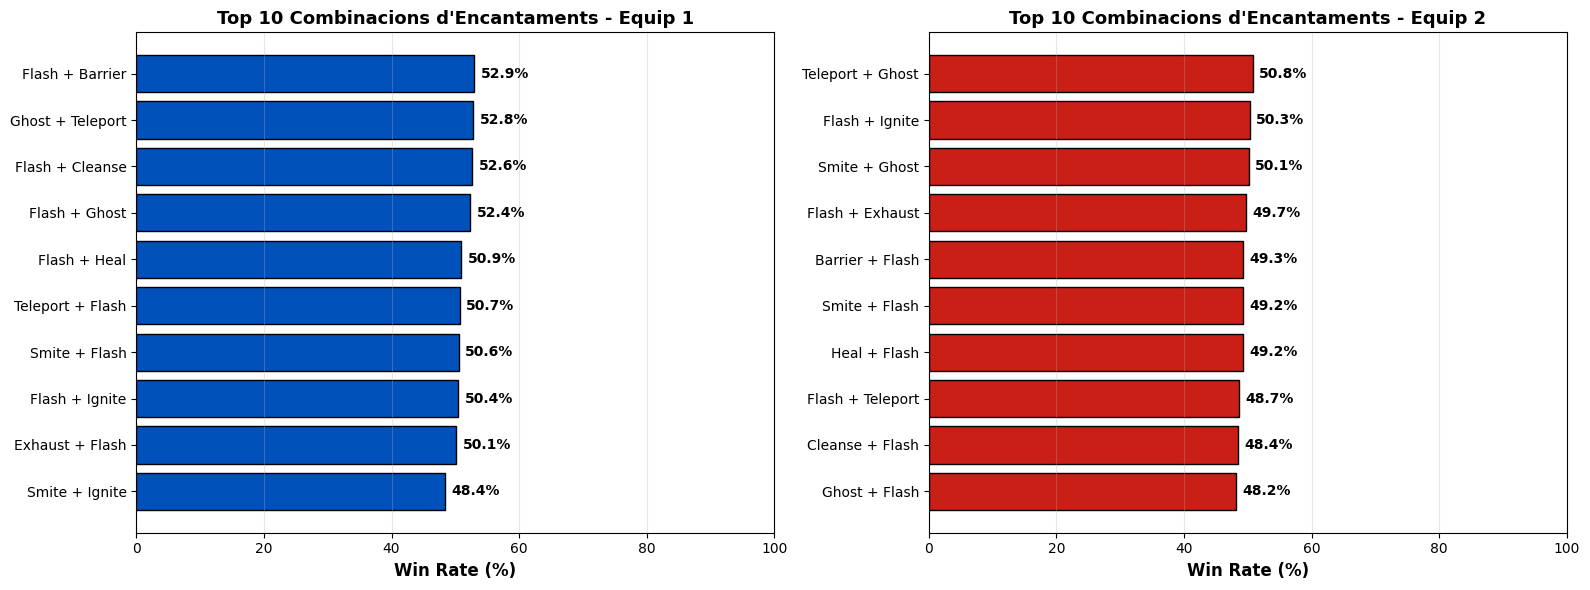

In [9]:
from collections import defaultdict

print("="*70)
print("🎯 WIN RATE PER COMBINACIÓ D'ENCANTAMENTS")
print("="*70)

# Calcular win rate per cada combinació d'encantaments per Team 1
win_rate_t1 = defaultdict(lambda: {'wins': 0, 'total': 0, 'names': None})

for idx, row in DataSet_cleaned.iterrows():
    # Team 1 - Recopilar tots els encantaments de l'equip
    spells_t1 = []
    for champ in range(1, 6):
        spell1_col = f't1_champ{champ}_sum1'
        spell2_col = f't1_champ{champ}_sum2'
        if pd.notna(row[spell1_col]):
            spells_t1.append(int(row[spell1_col]))
        if pd.notna(row[spell2_col]):
            spells_t1.append(int(row[spell2_col]))
    
    # Obtenir la combinació més usada (ordenada per apareixer en ordre)
    if len(spells_t1) >= 2:
        # Agrupar els dos primers encantaments més comuns de l'equip
        spell_combo_t1 = tuple(sorted(spells_t1[:2]))
        
        spell1_name = get_spell_name(spells_t1[0])
        spell2_name = get_spell_name(spells_t1[1])
        
        win_rate_t1[spell_combo_t1]['names'] = f"{spell1_name} + {spell2_name}"
        win_rate_t1[spell_combo_t1]['total'] += 1
        if row['winner'] == 1:
            win_rate_t1[spell_combo_t1]['wins'] += 1

# Calcular win rate per Team 2
win_rate_t2 = defaultdict(lambda: {'wins': 0, 'total': 0, 'names': None})

for idx, row in DataSet_cleaned.iterrows():
    # Team 2 - Recopilar tots els encantaments de l'equip
    spells_t2 = []
    for champ in range(1, 6):
        spell1_col = f't2_champ{champ}_sum1'
        spell2_col = f't2_champ{champ}_sum2'
        if pd.notna(row[spell1_col]):
            spells_t2.append(int(row[spell1_col]))
        if pd.notna(row[spell2_col]):
            spells_t2.append(int(row[spell2_col]))
    
    # Obtenir la combinació més usada (ordenada per apareixer en ordre)
    if len(spells_t2) >= 2:
        # Agrupar els dos primers encantaments més comuns de l'equip
        spell_combo_t2 = tuple(sorted(spells_t2[:2]))
        
        spell1_name = get_spell_name(spells_t2[0])
        spell2_name = get_spell_name(spells_t2[1])
        
        win_rate_t2[spell_combo_t2]['names'] = f"{spell1_name} + {spell2_name}"
        win_rate_t2[spell_combo_t2]['total'] += 1
        if row['winner'] == 2:
            win_rate_t2[spell_combo_t2]['wins'] += 1

# Filtrar combinacions amb mínim de 50 partides per a fiabilitat
min_games = 50

print(f"\n📊 TOP 10 COMBINACIONS D'ENCANTAMENTS - EQUIP 1")
print(f"(Filtrant combinacions amb mínim {min_games} partides)\n")
header = f"{'Combinació':<30} {'Partides':<12} {'Victòries':<12} {'Win Rate':<12}"
print(header)
print("-"*70)

sorted_t1 = sorted(
    [(combo, stats) for combo, stats in win_rate_t1.items() if stats['total'] >= min_games],
    key=lambda x: x[1]['wins'] / x[1]['total'] if x[1]['total'] > 0 else 0,
    reverse=True
)

for idx, (combo, stats) in enumerate(sorted_t1[:10], 1):
    if stats['total'] > 0:
        win_rate = (stats['wins'] / stats['total']) * 100
        print(f"{idx:2d}. {stats['names']:<28} {stats['total']:<12} {stats['wins']:<12} {win_rate:6.2f}%")

print(f"\n📊 TOP 10 COMBINACIONS D'ENCANTAMENTS - EQUIP 2")
print(f"(Filtrunt combinacions amb mínim {min_games} partides)\n")
print(header)
print("-"*70)

sorted_t2 = sorted(
    [(combo, stats) for combo, stats in win_rate_t2.items() if stats['total'] >= min_games],
    key=lambda x: x[1]['wins'] / x[1]['total'] if x[1]['total'] > 0 else 0,
    reverse=True
)

for idx, (combo, stats) in enumerate(sorted_t2[:10], 1):
    if stats['total'] > 0:
        win_rate = (stats['wins'] / stats['total']) * 100
        print(f"{idx:2d}. {stats['names']:<28} {stats['total']:<12} {stats['wins']:<12} {win_rate:6.2f}%")

# Visualització gràfica
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gràfic Team 1
names_t1 = [stats['names'] for combo, stats in sorted_t1[:10]]
win_rates_t1 = [(stats['wins'] / stats['total']) * 100 for combo, stats in sorted_t1[:10]]

axes[0].barh(names_t1, win_rates_t1, color='#0051BA', edgecolor='black')
axes[0].set_xlabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Combinacions d' + chr(39) + 'Encantaments - Equip 1', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_xlim([0, 100])

# Afegir percentatges
for i, rate in enumerate(win_rates_t1):
    axes[0].text(rate + 1, i, f'{rate:.1f}%', va='center', fontweight='bold')

# Gràfic Team 2
names_t2 = [stats['names'] for combo, stats in sorted_t2[:10]]
win_rates_t2 = [(stats['wins'] / stats['total']) * 100 for combo, stats in sorted_t2[:10]]

axes[1].barh(names_t2, win_rates_t2, color='#C91F16', edgecolor='black')
axes[1].set_xlabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Combinacions d' + chr(39) + 'Encantaments - Equip 2', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_xlim([0, 100])

# Afegir percentatges
for i, rate in enumerate(win_rates_t2):
    axes[1].text(rate + 1, i, f'{rate:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Com ja ens ho imaginàvem, les combinacions dels encanteris que més utilizen, per part dels dos equips, té l'encanteri **Flash**.

## Relació entre Tags dels Hèrois i Encantaments

Analitzem si existeix alguna relació entre els tags dels hèrois (Mage, Support, Marksman, Tank, Fighter, Assassin) dels equips i els encantamientss que seleccionen. Això ens ajudarà a entendre si certes composicions de roles prefereixen certs encantamientos.

🏆 RELACIÓ ENTRE TAGS DELS HÈROIS I ENCANTAMIENTOS

📊 TOP 5 ENCANTAMIENTOS PER CADA TAG - EQUIP 1


Assassin:
--------------------------------------------------
  • Flash                 43735 usos ( 48.9%)
  • Teleport               9816 usos ( 11.0%)
  • Heal                   8977 usos ( 10.0%)
  • Smite                  8972 usos ( 10.0%)
  • Ignite                 8109 usos (  9.1%)

Fighter:
--------------------------------------------------
  • Flash                 49155 usos ( 48.9%)
  • Teleport              11074 usos ( 11.0%)
  • Smite                 10101 usos ( 10.1%)
  • Heal                  10082 usos ( 10.0%)
  • Ignite                 8799 usos (  8.8%)

Mage:
--------------------------------------------------
  • Flash                 46030 usos ( 48.9%)
  • Teleport              10423 usos ( 11.1%)
  • Smite                  9466 usos ( 10.1%)
  • Heal                   9407 usos ( 10.0%)
  • Ignite                 8001 usos (  8.5%)

Marksman:
--------------------

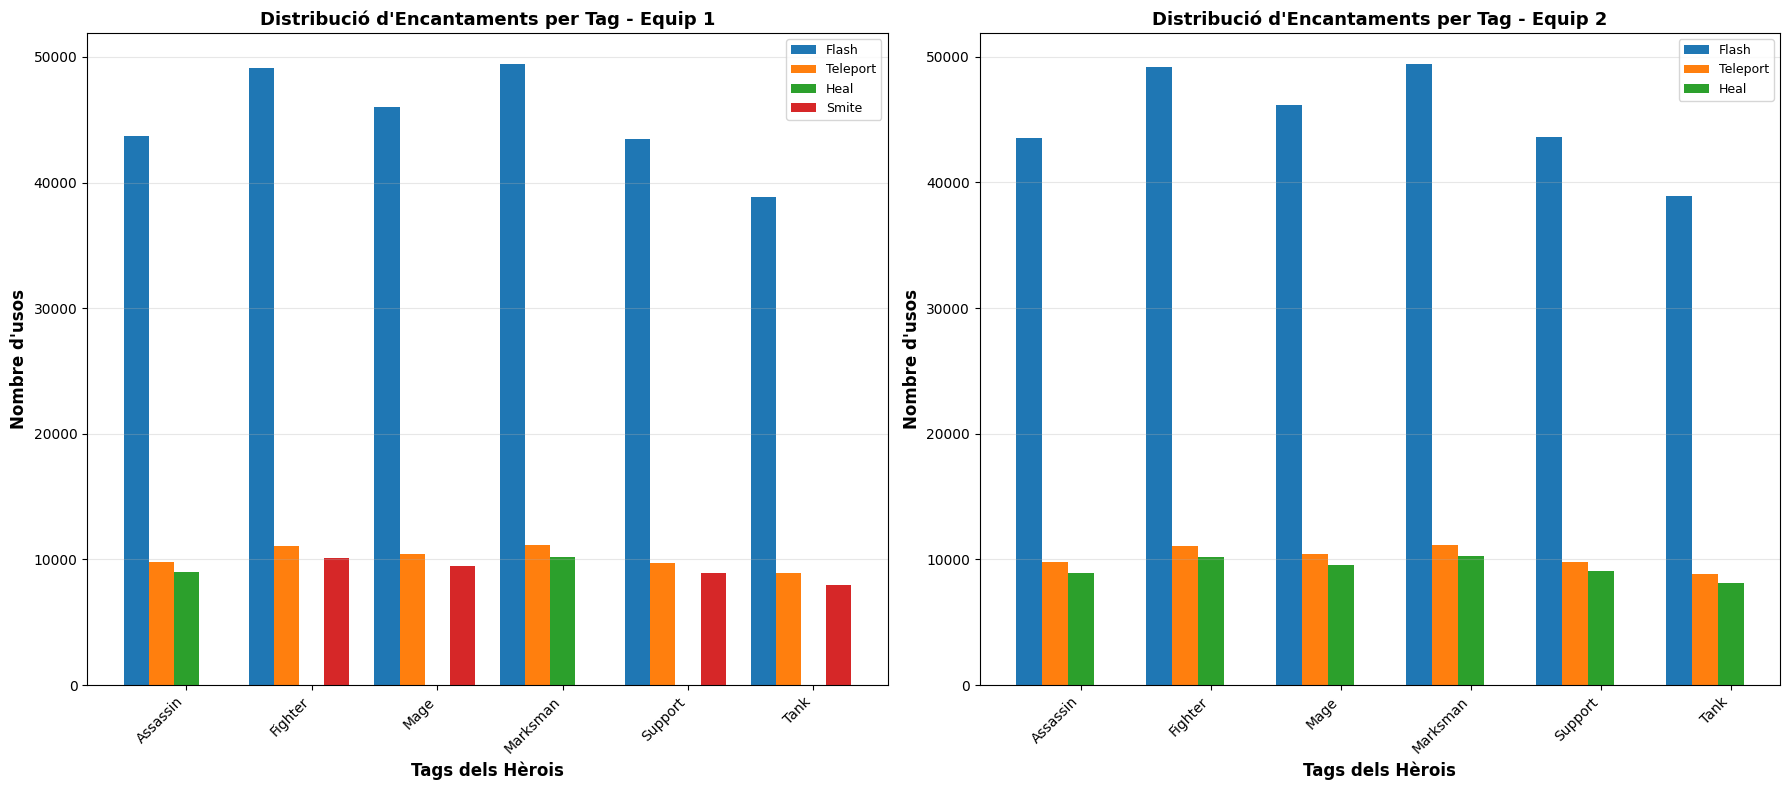

In [10]:
import json

champion_info = carregar_herois_cache()

# Crear mapatge de champion ID a tags
champion_id_to_tags = {}
for champ_key, champ_data in champion_info['data'].items():
    if 'id' in champ_data and 'tags' in champ_data:
        champion_id_to_tags[champ_data['id']] = champ_data['tags']

def get_champion_tags(champ_id):
    """Retorna els tags del campeó"""
    return champion_id_to_tags.get(champ_id, [])

print("="*70)
print("🏆 RELACIÓ ENTRE TAGS DELS HÈROIS I ENCANTAMIENTOS")
print("="*70)

# Analitzar la relació entre tags i encantaments per Team 1
tags_to_spells_t1 = defaultdict(lambda: defaultdict(int))

for idx, row in DataSet_cleaned.iterrows():
    # Recopilar tots els tags dels campeones de Team 1
    team_tags = []
    for champ in range(1, 6):
        champ_id = int(row[f't1_champ{champ}id'])
        tags = get_champion_tags(champ_id)
        team_tags.extend(tags)
    
    # Recopilar tots els encantaments de Team 1
    spells_t1 = []
    for champ in range(1, 6):
        spell1_col = f't1_champ{champ}_sum1'
        spell2_col = f't1_champ{champ}_sum2'
        if pd.notna(row[spell1_col]):
            spells_t1.append(int(row[spell1_col]))
        if pd.notna(row[spell2_col]):
            spells_t1.append(int(row[spell2_col]))
    
    # Registrar relació tag -> encantament
    if team_tags and spells_t1:
        # Els tags més comuns de l'equip
        unique_tags = set(team_tags)
        # Els encantaments més comuns
        for spell_id in spells_t1[:2]:  # Primer dos encantaments
            spell_name = get_spell_name(spell_id)
            for tag in unique_tags:
                tags_to_spells_t1[tag][spell_name] += 1

# Analitzar la relació entre tags i encantaments per Team 2
tags_to_spells_t2 = defaultdict(lambda: defaultdict(int))

for idx, row in DataSet_cleaned.iterrows():
    # Recopilar tots els tags dels campeones de Team 2
    team_tags = []
    for champ in range(1, 6):
        champ_id = int(row[f't2_champ{champ}id'])
        tags = get_champion_tags(champ_id)
        team_tags.extend(tags)
    
    # Recopilar tots els encantaments de Team 2
    spells_t2 = []
    for champ in range(1, 6):
        spell1_col = f't2_champ{champ}_sum1'
        spell2_col = f't2_champ{champ}_sum2'
        if pd.notna(row[spell1_col]):
            spells_t2.append(int(row[spell1_col]))
        if pd.notna(row[spell2_col]):
            spells_t2.append(int(row[spell2_col]))
    
    # Registrar relació tag -> encantament
    if team_tags and spells_t2:
        # Els tags més comuns de l'equip
        unique_tags = set(team_tags)
        # Els encantaments més comuns
        for spell_id in spells_t2[:2]:  # Primer dos encantaments
            spell_name = get_spell_name(spell_id)
            for tag in unique_tags:
                tags_to_spells_t2[tag][spell_name] += 1

# Mostrar resultats per Team 1
print("\n📊 TOP 5 ENCANTAMIENTOS PER CADA TAG - EQUIP 1\n")

for tag in sorted(tags_to_spells_t1.keys()):
    print(f"\n{tag}:")
    print("-" * 50)
    spell_counts = tags_to_spells_t1[tag]
    top_spells_for_tag = sorted(spell_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    
    for spell_name, count in top_spells_for_tag:
        percentage = (count / sum(spell_counts.values())) * 100 if sum(spell_counts.values()) > 0 else 0
        print(f"  • {spell_name:<20} {count:>6} usos ({percentage:>5.1f}%)")

# Mostrar resultats per Team 2
print("\n\n📊 TOP 5 ENCANTAMIENTOS PER CADA TAG - EQUIP 2\n")

for tag in sorted(tags_to_spells_t2.keys()):
    print(f"\n{tag}:")
    print("-" * 50)
    spell_counts = tags_to_spells_t2[tag]
    top_spells_for_tag = sorted(spell_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    
    for spell_name, count in top_spells_for_tag:
        percentage = (count / sum(spell_counts.values())) * 100 if sum(spell_counts.values()) > 0 else 0
        print(f"  • {spell_name:<20} {count:>6} usos ({percentage:>5.1f}%)")

# Crear visualització gràfica
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gràfic Team 1: Distribució d'encantaments per tag
tags_list = sorted(tags_to_spells_t1.keys())
data_t1 = {}

for tag in tags_list:
    spell_counts = tags_to_spells_t1[tag]
    top_spells = sorted(spell_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for spell_name, count in top_spells:
        if spell_name not in data_t1:
            data_t1[spell_name] = {}
        data_t1[spell_name][tag] = count

# Convertir a DataFrame per a millor visualització
import numpy as np
spell_names = list(data_t1.keys())
x = np.arange(len(tags_list))
width = 0.2

for i, spell_name in enumerate(spell_names[:5]):  # Top 5 spells
    counts = [data_t1[spell_name].get(tag, 0) for tag in tags_list]
    axes[0].bar(x + i*width, counts, width, label=spell_name)

axes[0].set_xlabel('Tags dels Hèrois', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d' + chr(39) + 'usos', fontsize=12, fontweight='bold')
axes[0].set_title('Distribució d' + chr(39) + 'Encantaments per Tag - Equip 1', fontsize=13, fontweight='bold')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(tags_list, rotation=45, ha='right')
axes[0].legend(fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

# Gràfic Team 2: Distribució d'encantaments per tag
tags_list_t2 = sorted(tags_to_spells_t2.keys())
data_t2 = {}

for tag in tags_list_t2:
    spell_counts = tags_to_spells_t2[tag]
    top_spells = sorted(spell_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for spell_name, count in top_spells:
        if spell_name not in data_t2:
            data_t2[spell_name] = {}
        data_t2[spell_name][tag] = count

spell_names_t2 = list(data_t2.keys())
x_t2 = np.arange(len(tags_list_t2))

for i, spell_name in enumerate(spell_names_t2[:5]):  # Top 5 spells
    counts = [data_t2[spell_name].get(tag, 0) for tag in tags_list_t2]
    axes[1].bar(x_t2 + i*width, counts, width, label=spell_name)

axes[1].set_xlabel('Tags dels Hèrois', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre d' + chr(39) + 'usos', fontsize=12, fontweight='bold')
axes[1].set_title('Distribució d' + chr(39) + 'Encantaments per Tag - Equip 2', fontsize=13, fontweight='bold')
axes[1].set_xticks(x_t2 + width * 2)
axes[1].set_xticklabels(tags_list_t2, rotation=45, ha='right')
axes[1].legend(fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Tampoc podem veure que hi hagi alguna diferència amb els tags, és a dir, la majoria d'herois també utilitza el **Flash**, no hi ha molt diversitat. També podem comentar que l'equip 2 fa ús de l'encanteri **heal** més que l'equip 1, al contrari amb l'encanteri **smite**.

## Anàlisi de Sinergia entre Encantaments d'un Equip

Estudiem si certes combinacions d'encantaments entre diferents jugadors d'un mateix equip milloren la probabilitat de victòria. Analitzarem:
- Les combinacions de 2 encantaments més freqüents dins d'un equip
- La taxa de victòria associada a cada combinació
- La sinergia (si la combinació augmenta o disminueix les probabilitats de victòria respecte a l'esperada)

⚡ ANÀLISI DE SINERGIA ENTRE ENCANTAMENTS D'UN EQUIP

🎯 Taxa de Victòria de Baseline:
   Equip 1: 50.65%
   Equip 2: 49.35%

📊 TOP 10 COMBINACIONS DE SINERGIA - EQUIP 1
(Filtrant combinacions amb mínim 50 partides)

Combinació                          Partides     Victòries    Win Rate     Sinergia    
-------------------------------------------------------------------------------------
 1. Encantament_14 + Encantament_21   2588         1354          52.32%    📈  +1.67%
 2. Encantament_7 + Encantament_21    7079         3655          51.63%    📈  +0.98%
 3. Encantament_11 + Encantament_21   7250         3737          51.54%    📈  +0.90%
 4. Encantament_4 + Encantament_21    7299         3756          51.46%    📈  +0.81%
 5. Encantament_6 + Encantament_21    591          304           51.44%    📈  +0.79%
 6. Encantament_3 + Encantament_21    5149         2648          51.43%    📈  +0.78%
 7. Encantament_12 + Encantament_21   6440         3300          51.24%    📈  +0.59%
 8. Encantament_

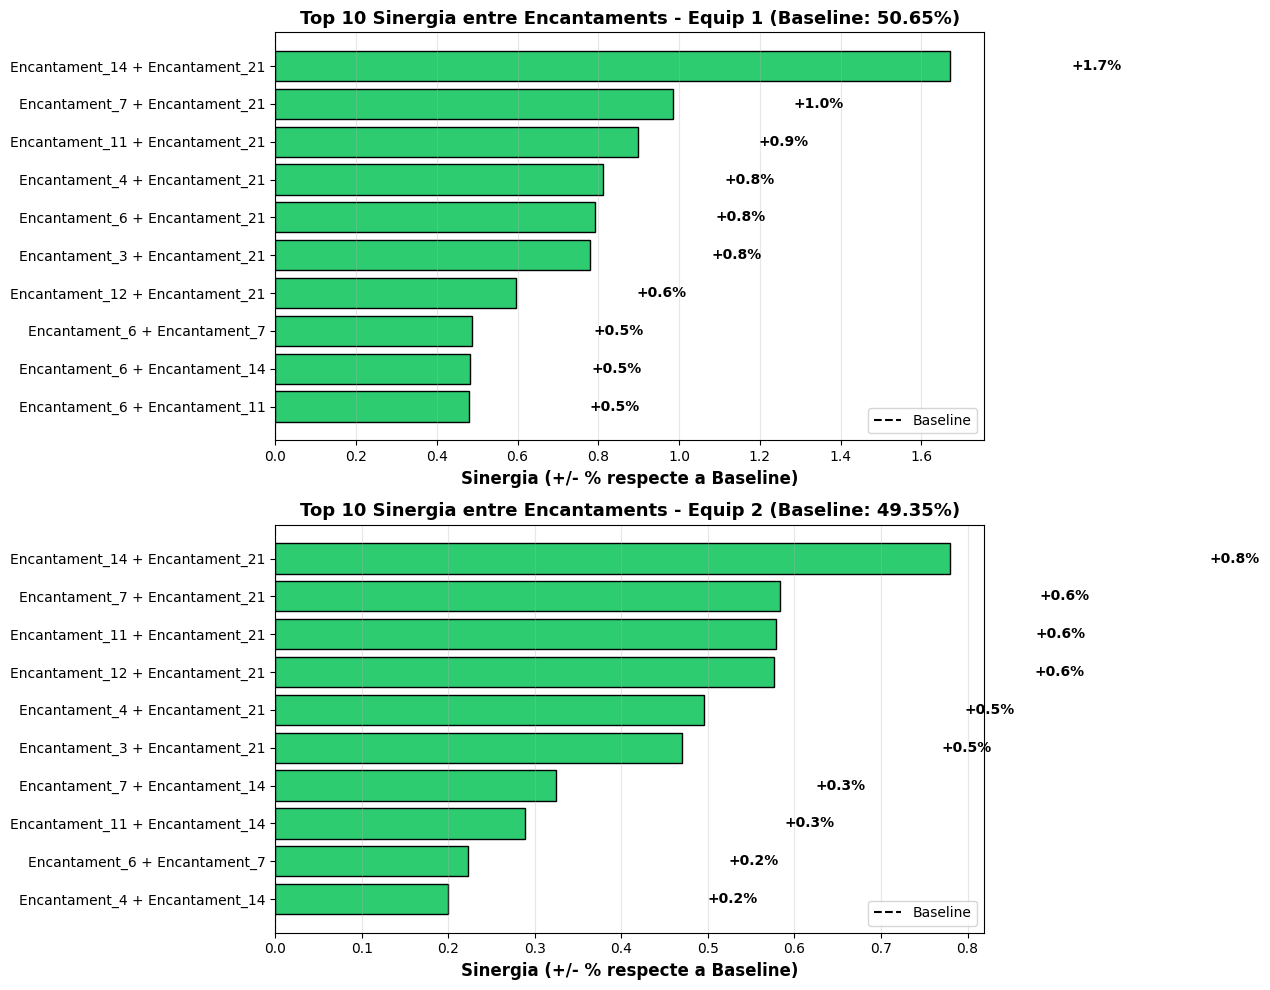


📈 ESTADÍSTIQUES DE SINERGIA

🔵 EQUIP 1:
   Synergies positives: 23
   Synergies negatives: 12
   Sinergia mitjana: +0.14%
   Millor sinergia: +1.67%
   Pitjor sinergia: -2.85%

🔴 EQUIP 2:
   Synergies positives: 19
   Synergies negatives: 16
   Sinergia mitjana: -0.39%
   Millor sinergia: +0.78%
   Pitjor sinergia: -5.19%



In [11]:
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("⚡ ANÀLISI DE SINERGIA ENTRE ENCANTAMENTS D'UN EQUIP")
print("="*80)

# Calcular sinergia
sinergia_data = calcula_sinergia_encanteris(DataSet_cleaned, min_synergy_games=50)

# Mostrar resultats
print(f"\n🎯 Taxa de Victòria de Baseline:")
print(f"   Equip 1: {sinergia_data['baseline_win_rate_t1']*100:.2f}%")
print(f"   Equip 2: {sinergia_data['baseline_win_rate_t2']*100:.2f}%")

print(f"\n📊 TOP 10 COMBINACIONS DE SINERGIA - EQUIP 1")
print(f"(Filtrant combinacions amb mínim {sinergia_data['min_synergy_games']} partides)\n")

header = f"{'Combinació':<35} {'Partides':<12} {'Victòries':<12} {'Win Rate':<12} {'Sinergia':<12}"
print(header)
print("-"*85)

for idx, (combo, stats) in enumerate(sinergia_data['sorted_synergies_t1'][:10], 1):
    if stats['total'] > 0:
        win_rate = (stats['wins'] / stats['total']) * 100
        synergy = win_rate - (sinergia_data['baseline_win_rate_t1'] * 100)
        synergy_symbol = "📈" if synergy > 0 else "📉" if synergy < 0 else "➡️"
        print(f"{idx:2d}. {combo:<33} {stats['total']:<12} {stats['wins']:<12} {win_rate:6.2f}%    {synergy_symbol} {synergy:+6.2f}%")

print(f"\n📊 TOP 10 COMBINACIONS DE SINERGIA - EQUIP 2")
print(f"(Filtrant combinacions amb mínim {sinergia_data['min_synergy_games']} partides)\n")
print(header)
print("-"*85)

for idx, (combo, stats) in enumerate(sinergia_data['sorted_synergies_t2'][:10], 1):
    if stats['total'] > 0:
        win_rate = (stats['wins'] / stats['total']) * 100
        synergy = win_rate - (sinergia_data['baseline_win_rate_t2'] * 100)
        synergy_symbol = "📈" if synergy > 0 else "📉" if synergy < 0 else "➡️"
        print(f"{idx:2d}. {combo:<33} {stats['total']:<12} {stats['wins']:<12} {win_rate:6.2f}%    {synergy_symbol} {synergy:+6.2f}%")

# VISUALITZACIONS
# Gràfic 1: Sinergia relativa (diferència respecte a baseline)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Team 1
colors_t1 = ['#2ecc71' if x > 0 else '#e74c3c' for x in sinergia_data['data_synergies_t1']]
axes[0].barh(sinergia_data['labels_synergies_t1'], sinergia_data['data_synergies_t1'], 
                color=colors_t1, edgecolor='black')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1.5, label='Baseline')
axes[0].set_xlabel('Sinergia (+/- % respecte a Baseline)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Top 10 Sinergia entre Encantaments - Equip 1 (Baseline: {sinergia_data["baseline_win_rate_t1"]*100:.2f}%)', 
                    fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
axes[0].legend()

# Afegir valors
for i, val in enumerate(sinergia_data['data_synergies_t1']):
    axes[0].text(val + (0.3 if val > 0 else -0.3), i, f'{val:+.1f}%', 
                va='center', fontweight='bold', ha='left' if val > 0 else 'right')

# Team 2
colors_t2 = ['#2ecc71' if x > 0 else '#e74c3c' for x in sinergia_data['data_synergies_t2']]
axes[1].barh(sinergia_data['labels_synergies_t2'], sinergia_data['data_synergies_t2'], 
                color=colors_t2, edgecolor='black')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1.5, label='Baseline')
axes[1].set_xlabel('Sinergia (+/- % respecte a Baseline)', fontsize=12, fontweight='bold')
axes[1].set_title(f'Top 10 Sinergia entre Encantaments - Equip 2 (Baseline: {sinergia_data["baseline_win_rate_t2"]*100:.2f}%)', 
                    fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)
axes[1].legend()

# Afegir valors
for i, val in enumerate(sinergia_data['data_synergies_t2']):
    axes[1].text(val + (0.3 if val > 0 else -0.3), i, f'{val:+.1f}%', 
                va='center', fontweight='bold', ha='left' if val > 0 else 'right')

plt.tight_layout()
plt.show()

# ESTADÍSTIQUES DE SINERGIA
print("\n" + "="*80)
print("📈 ESTADÍSTIQUES DE SINERGIA")
print("="*80)

print(f"\n🔵 EQUIP 1:")
print(f"   Synergies positives: {sum(1 for x in sinergia_data['synergies_t1_values'] if x > 0)}")
print(f"   Synergies negatives: {sum(1 for x in sinergia_data['synergies_t1_values'] if x < 0)}")
print(f"   Sinergia mitjana: {np.mean(sinergia_data['synergies_t1_values']):+.2f}%")
print(f"   Millor sinergia: {max(sinergia_data['synergies_t1_values']):+.2f}%")
print(f"   Pitjor sinergia: {min(sinergia_data['synergies_t1_values']):+.2f}%")

print(f"\n🔴 EQUIP 2:")
print(f"   Synergies positives: {sum(1 for x in sinergia_data['synergies_t2_values'] if x > 0)}")
print(f"   Synergies negatives: {sum(1 for x in sinergia_data['synergies_t2_values'] if x < 0)}")
print(f"   Sinergia mitjana: {np.mean(sinergia_data['synergies_t2_values']):+.2f}%")
print(f"   Millor sinergia: {max(sinergia_data['synergies_t2_values']):+.2f}%")
print(f"   Pitjor sinergia: {min(sinergia_data['synergies_t2_values']):+.2f}%")

print("\n" + "="*80)

# Implementacions al dataset per millor entrenament

Pel que em pogut observar si hi ha certes combinacions d'encantamnents que tenen una sinergia que pot tenir relació amb el win-rate de cadascun dels equips. 

Així que mirarem si afegint una nova columna que puntui aquesta sinergia, pot ajudar al model a poder predir victories més precises.

També eliminarem les columnes afegides mitjançant la funció **comptar_combinacions_encanteris**, ja que visualitzant les dades, em pogut veure que no existeix camp relació i no ens aporta molta iformació.

In [12]:
# Afegir columnes de score de sinergia
data_set = afegir_score_sinergia_encanteris(DataSet_encanteris, min_synergy_games=50)
data_set.head()

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t1_champ3_spell_index,t1_champ4_spell_index,t1_champ5_spell_index,t2_champ1_spell_index,t2_champ2_spell_index,t2_champ3_spell_index,t2_champ4_spell_index,t2_champ5_spell_index,t1_score_sum_sinergia,t2_score_sum_sinergia
0,3326086514,1,2,1,1,1,1,2,8,12,...,6,1,4,5,6,2,4,0,3.734109,1.258823
1,3229566029,1,1,1,1,0,1,1,119,7,...,0,4,5,3,4,5,4,6,1.348449,1.184784
2,3327363504,1,2,1,1,1,2,0,18,4,...,0,3,3,6,4,3,5,6,0.236838,1.184784
3,3326856598,1,1,1,1,1,1,0,57,4,...,6,7,5,4,5,0,4,6,-0.940777,0.928479
4,3330080762,1,2,1,1,1,1,0,19,4,...,0,6,6,0,3,5,3,6,0.236838,-0.247289


# Correlació

In [13]:
def crear_matriu_correlacio(df, target_attribute='winner', figsize=(12, 10)):
    
    import seaborn as sns

    # Filtrar només columnes numèriques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    print("=" * 60)
    print("MATRIU DE CORRELACIÓ - ANÀLISI COMPLET")
    print("=" * 60)
    
    # 1. MATRIU DE CORRELACIÓ COMPLETA
    corr_matrix = df_numeric.corr()
    
    plt.figure(figsize=figsize)
    
    # Màscara per amagar la triangular superior (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlacions
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={"shrink": .8})
    
    plt.title('Matriu de Correlacions - Variables Numèriques', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # 2. CORRELACIONS AMB EL TARGET (MÉS IMPORTANT)
    if target_attribute in df_numeric.columns:
        print(f"\n{'='*50}")
        print(f"CORRELACIONS AMB EL TARGET: {target_attribute}")
        print(f"{'='*50}")
        
        # Ordenar correlacions amb el target
        target_correlations = corr_matrix[target_attribute].sort_values(ascending=False)
        
        # Crear DataFrame per mostrar resultats
        target_corr_df = pd.DataFrame({
            'Variable': target_correlations.index,
            'Correlació': target_correlations.values
        })
        
        # Eliminar la correlació del target amb si mateix
        target_corr_df = target_corr_df[target_corr_df['Variable'] != target_attribute]
        
        print(target_corr_df.to_string(index=False))
        
        # Gràfic de correlacions amb el target
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'green' for x in target_corr_df['Correlació']]
        bars = plt.barh(target_corr_df['Variable'], target_corr_df['Correlació'], color=colors, alpha=0.7)
        
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.axvline(x=0.3, color='blue', linestyle='--', alpha=0.5, label='Correlació moderada')
        plt.axvline(x=-0.3, color='blue', linestyle='--', alpha=0.5)
        plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Correlació forta')
        plt.axvline(x=-0.5, color='red', linestyle='--', alpha=0.5)
        
        # Afegir valors a les barres
        for bar, value in zip(bars, target_corr_df['Correlació']):
            plt.text(bar.get_width() + (0.01 if value >= 0 else -0.03), 
                    bar.get_y() + bar.get_height()/2, 
                    f'{value:.3f}', 
                    ha='left' if value >= 0 else 'right', 
                    va='center',
                    fontweight='bold')
        
        plt.xlabel('Coeficient de Correlació (Pearson)')
        plt.title(f'Correlacions de les Variables amb {target_attribute}', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 3. ANÀLISI DE CORRELACIONS FORTES ENTRE VARIABLES
    print(f"\n{'='*50}")
    print("CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)")
    print(f"{'='*50}")
    
    # Trobar correlacions fortes (excloent autocorrelacions)
    strong_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Llindar per correlació forta
                strong_correlations.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlació': corr_value
                })
    
    if strong_correlations:
        strong_corr_df = pd.DataFrame(strong_correlations)
        strong_corr_df = strong_corr_df.sort_values('Correlació', key=abs, ascending=False)
        print("Correlacions fortes (> |0.5|) entre variables:")
        print(strong_corr_df.to_string(index=False))
    else:
        print("No s'han trobat correlacions fortes (> |0.5|) entre variables")
    
    # 4. RESUM DE LES VARIABLES MÉS RELLEVANTS
    if target_attribute in df_numeric.columns:
        print(f"\n{'='*50}")
        print("RESUM - VARIABLES MÉS RELLEVANTS PER AL MODEL")
        print(f"{'='*50}")
        
        # Variables amb correlació forta amb el target
        strong_target_corr = target_corr_df[abs(target_corr_df['Correlació']) > 0.05]
        
        if not strong_target_corr.empty:
            print("Variables amb correlació forta/moderada amb el target (|r| > 0.05):")
            for _, row in strong_target_corr.iterrows():
                direction = "positiva" if row['Correlació'] > 0 else "negativa"
                print(f"  - {row['Variable']}: {row['Correlació']:.3f} ({direction})")
        else:
            print("Cap variable mostra correlació forta amb el target (|r| > 0.3)")
        
        # Variables amb baixa correlació amb el target
        weak_target_corr = target_corr_df[abs(target_corr_df['Correlació']) < 0.05]
        if not weak_target_corr.empty:
            print(f"\nVariables amb baixa correlació amb el target (|r| < 0.05):")
            for _, row in weak_target_corr.iterrows():
                print(f"  - {row['Variable']}: {row['Correlació']:.3f}")
    
    return corr_matrix

## Model 1

In [14]:
cols_to_remove = [f't{team}_champ{i}id' for team in [1, 2] for i in range(1, 6)]
cols_to_remove += [f't{team}_champ{champ}_sum{s}' for team in [1, 2] for champ in range(1, 6) for s in [1,2]]
cols_to_remove += [f't{team}_ban{champ}' for team in [1, 2] for champ in range(1, 6)]
cols_to_remove += [f't{team}_champ{i}_spell_index' for team in [1, 2] for i in range(1, 6)]

# Verificar quines columnes existeixen
existing_cols = [col for col in cols_to_remove if col in data_set.columns]
data_set = data_set.drop(columns=existing_cols, errors='ignore')
print(f"Columnes restants: {data_set.shape[1]}")

Columnes restants: 20


MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


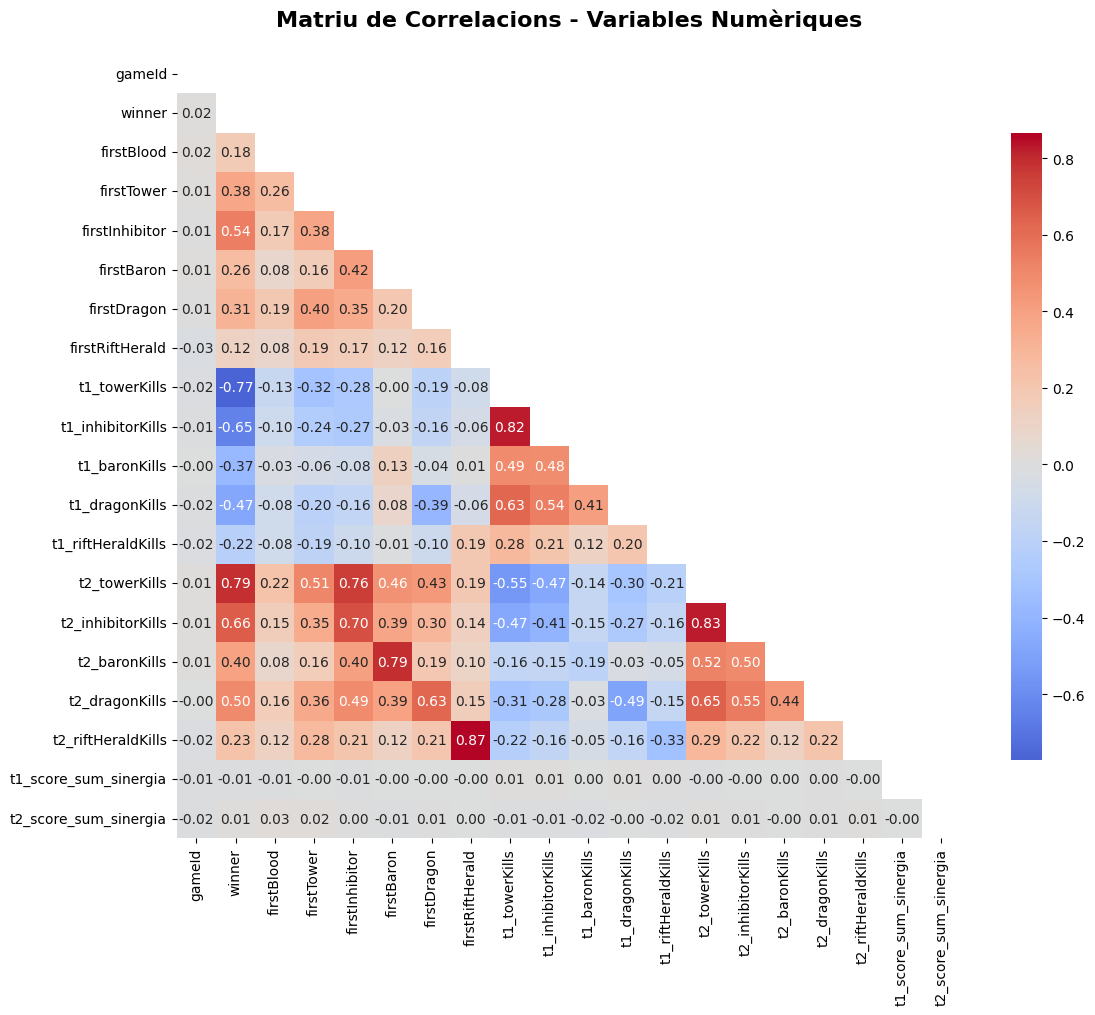


CORRELACIONS AMB EL TARGET: winner
             Variable  Correlació
        t2_towerKills    0.785722
    t2_inhibitorKills    0.660696
       firstInhibitor    0.536404
       t2_dragonKills    0.497055
        t2_baronKills    0.398692
           firstTower    0.376347
          firstDragon    0.310220
           firstBaron    0.261336
   t2_riftHeraldKills    0.226131
           firstBlood    0.175564
      firstRiftHerald    0.119891
               gameId    0.015016
t2_score_sum_sinergia    0.012048
t1_score_sum_sinergia   -0.012741
   t1_riftHeraldKills   -0.218057
        t1_baronKills   -0.369883
       t1_dragonKills   -0.472635
    t1_inhibitorKills   -0.649636
        t1_towerKills   -0.771571


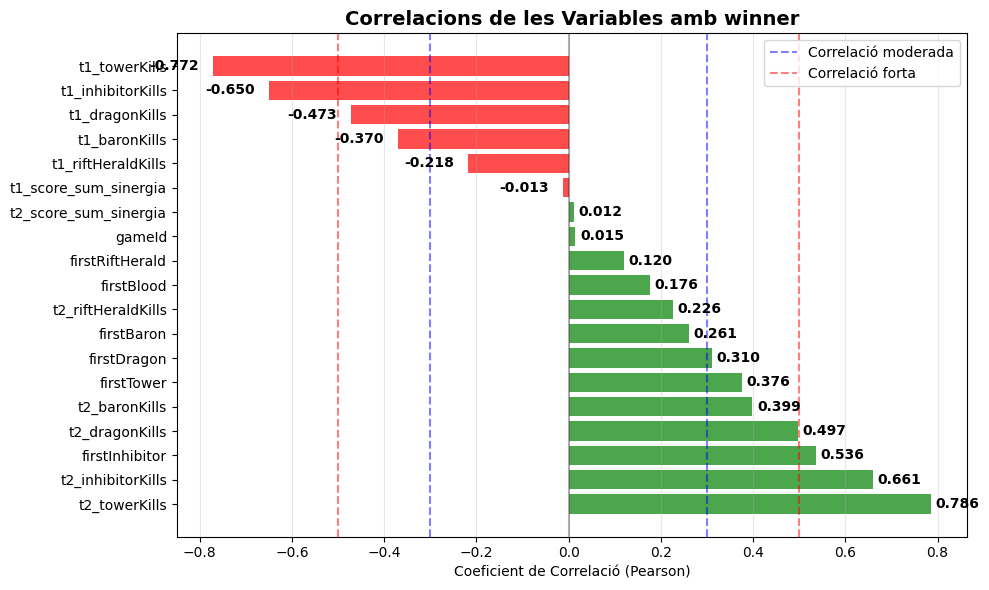


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
Correlacions fortes (> |0.5|) entre variables:
       Variable 1         Variable 2  Correlació
  firstRiftHerald t2_riftHeraldKills    0.866861
    t2_towerKills  t2_inhibitorKills    0.826064
    t1_towerKills  t1_inhibitorKills    0.824581
       firstBaron      t2_baronKills    0.793116
           winner      t2_towerKills    0.785722
           winner      t1_towerKills   -0.771571
   firstInhibitor      t2_towerKills    0.755575
   firstInhibitor  t2_inhibitorKills    0.700099
           winner  t2_inhibitorKills    0.660696
           winner  t1_inhibitorKills   -0.649636
    t2_towerKills     t2_dragonKills    0.648053
      firstDragon     t2_dragonKills    0.629829
    t1_towerKills     t1_dragonKills    0.626911
    t1_towerKills      t2_towerKills   -0.548947
t2_inhibitorKills     t2_dragonKills    0.548121
t1_inhibitorKills     t1_dragonKills    0.538541
           winner     firstInhibitor    0.536404
    t2_tower

,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t1_score_sum_sinergia,t2_score_sum_sinergia
gameId,1.000000,0.015016,0.017194,0.012556,0.008464,0.013243,0.005624,-0.028647,-0.021301,-0.013964,-0.002301,-0.016130,-0.018935,0.010191,0.010378,0.014212,-0.002069,-0.017967,-0.011485,-0.015916
winner,0.015016,1.000000,0.175564,0.376347,0.536404,0.261336,0.310220,0.119891,-0.771571,-0.649636,-0.369883,-0.472635,-0.218057,0.785722,0.660696,0.398692,0.497055,0.226131,-0.012741,0.012048
firstBlood,0.017194,0.175564,1.000000,0.264325,0.170804,0.077350,0.189843,0.084182,-0.128670,-0.099121,-0.031019,-0.083150,-0.081648,0.224426,0.151747,0.076552,0.161871,0.122499,-0.010503,0.026329
firstTower,0.012556,0.376347,0.264325,1.000000,0.381071,0.164939,0.404321,0.186341,-0.316782,-0.240453,-0.057306,-0.201307,-0.188592,0.511856,0.348144,0.161570,0.364797,0.275147,-0.002346,0.016909
firstInhibitor,0.008464,0.536404,0.170804,0.381071,1.000000,0.417355,0.352842,0.167241,-0.276164,-0.269314,-0.076752,-0.161129,-0.100633,0.755575,0.700099,0.399750,0.487555,0.212102,-0.005388,0.004107
firstBaron,0.013243,0.261336,0.077350,0.164939,0.417355,1.000000,0.201134,0.121363,-0.003266,-0.025641,0.134415,0.082371,-0.009437,0.459894,0.385780,0.793116,0.393729,0.121635,-0.000175,-0.009832
firstDragon,0.005624,0.310220,0.189843,0.404321,0.352842,0.201134,1.000000,0.159920,-0.190222,-0.164389,-0.044779,-0.386540,-0.101843,0.427294,0.299887,0.194963,0.629829,0.205668,-0.001979,0.008395
firstRiftHerald,-0.028647,0.119891,0.084182,0.186341,0.167241,0.121363,0.159920,1.000000,-0.083728,-0.059683,0.008371,-0.057769,0.188883,0.188457,0.142112,0.101560,0.150474,0.866861,-0.000812,0.001528
t1_towerKills,-0.021301,-0.771571,-0.128670,-0.316782,-0.276164,-0.003266,-0.190222,-0.083728,1.000000,0.824581,0.490731,0.626911,0.283986,-0.548947,-0.469495,-0.157946,-0.313377,-0.224786,0.014239,-0.013939
t1_inhibitorKills,-0.013964,-0.649636,-0.099121,-0.240453,-0.269314,-0.025641,-0.164389,-0.059683,0.824581,1.000000,0.481664,0.538541,0.210907,-0.467946,-0.408973,-0.152538,-0.278992,-0.164535,0.013142,-0.011157


In [15]:
crear_matriu_correlacio(data_set, target_attribute='winner', figsize=(12, 10))

## Model 2

In [16]:
# Eliminació columnes determinades per la primera correlació
cols_to_remove = [f't{team}_champ{i}id' for team in [1, 2] for i in range(1, 6)]
cols_to_remove += [f't{team}_champ{champ}_sum{s}' for team in [1, 2] for champ in range(1, 6) for s in [1,2]]
cols_to_remove += [f't{team}_ban{champ}' for team in [1, 2] for champ in range(1, 6)]


# Eliminació de columnes que determinen quins herois de cada equip a acabat amb una estructura
cols_to_remove  += ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
                    't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']


# Verificar quines columnes existeixen
existing_cols = [col for col in cols_to_remove if col in data_set.columns]
data_set = data_set.drop(columns=existing_cols, errors='ignore')
print(f"Columnes restants: {data_set.shape[1]}")


Columnes restants: 10


MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


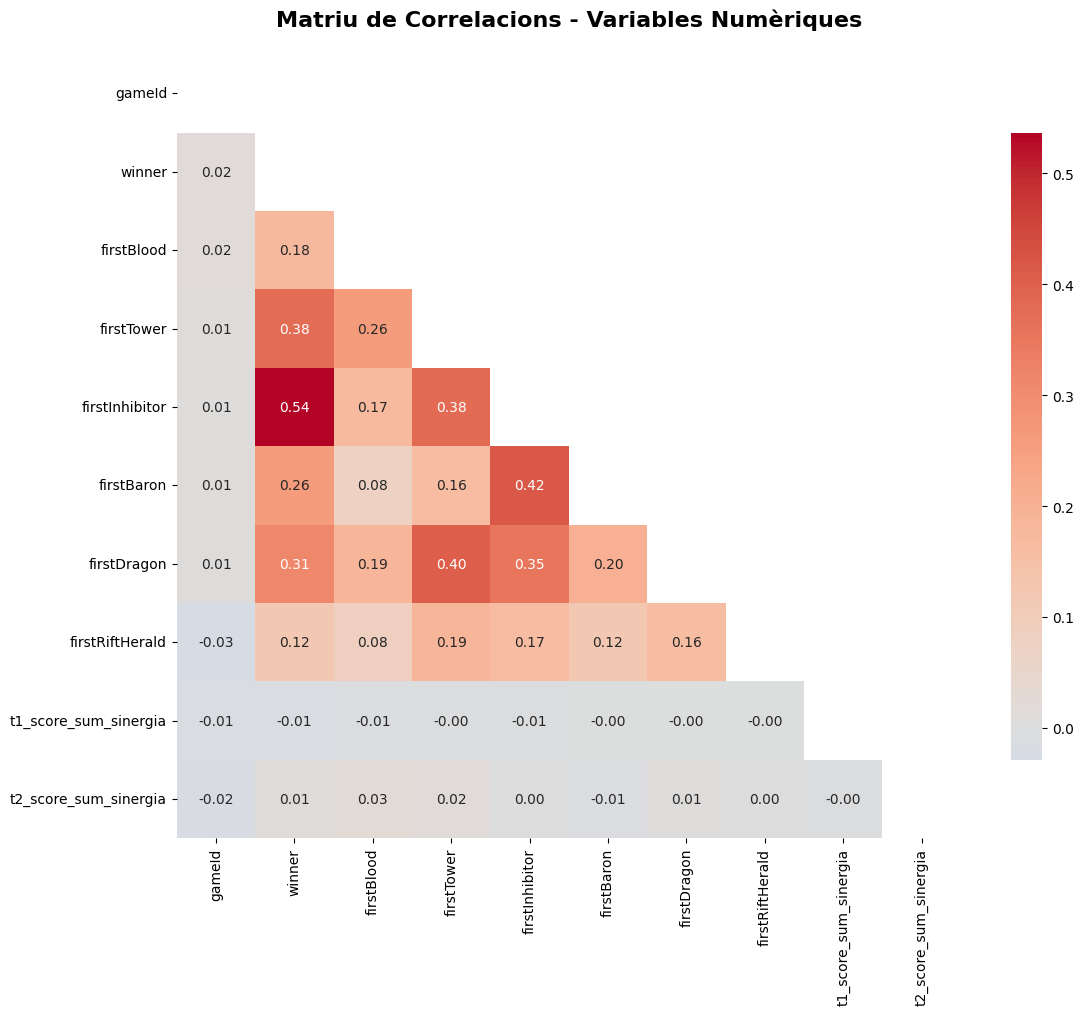


CORRELACIONS AMB EL TARGET: winner
             Variable  Correlació
       firstInhibitor    0.536404
           firstTower    0.376347
          firstDragon    0.310220
           firstBaron    0.261336
           firstBlood    0.175564
      firstRiftHerald    0.119891
               gameId    0.015016
t2_score_sum_sinergia    0.012048
t1_score_sum_sinergia   -0.012741


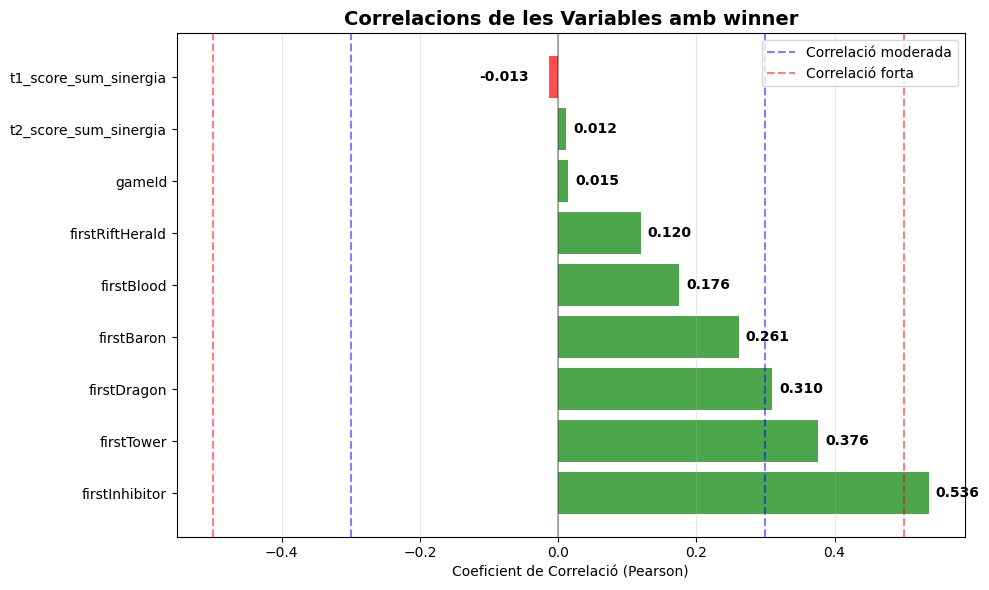


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
Correlacions fortes (> |0.5|) entre variables:
Variable 1     Variable 2  Correlació
    winner firstInhibitor    0.536404

RESUM - VARIABLES MÉS RELLEVANTS PER AL MODEL
Variables amb correlació forta/moderada amb el target (|r| > 0.05):
  - firstInhibitor: 0.536 (positiva)
  - firstTower: 0.376 (positiva)
  - firstDragon: 0.310 (positiva)
  - firstBaron: 0.261 (positiva)
  - firstBlood: 0.176 (positiva)
  - firstRiftHerald: 0.120 (positiva)

Variables amb baixa correlació amb el target (|r| < 0.05):
  - gameId: 0.015
  - t2_score_sum_sinergia: 0.012
  - t1_score_sum_sinergia: -0.013


,gameId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_score_sum_sinergia,t2_score_sum_sinergia
gameId,1.000000,0.015016,0.017194,0.012556,0.008464,0.013243,0.005624,-0.028647,-0.011485,-0.015916
winner,0.015016,1.000000,0.175564,0.376347,0.536404,0.261336,0.310220,0.119891,-0.012741,0.012048
firstBlood,0.017194,0.175564,1.000000,0.264325,0.170804,0.077350,0.189843,0.084182,-0.010503,0.026329
firstTower,0.012556,0.376347,0.264325,1.000000,0.381071,0.164939,0.404321,0.186341,-0.002346,0.016909
firstInhibitor,0.008464,0.536404,0.170804,0.381071,1.000000,0.417355,0.352842,0.167241,-0.005388,0.004107
firstBaron,0.013243,0.261336,0.077350,0.164939,0.417355,1.000000,0.201134,0.121363,-0.000175,-0.009832
firstDragon,0.005624,0.310220,0.189843,0.404321,0.352842,0.201134,1.000000,0.159920,-0.001979,0.008395
firstRiftHerald,-0.028647,0.119891,0.084182,0.186341,0.167241,0.121363,0.159920,1.000000,-0.000812,0.001528
t1_score_sum_sinergia,-0.011485,-0.012741,-0.010503,-0.002346,-0.005388,-0.000175,-0.001979,-0.000812,1.000000,-0.003474
t2_score_sum_sinergia,-0.015916,0.012048,0.026329,0.016909,0.004107,-0.009832,0.008395,0.001528,-0.003474,1.000000


In [17]:
crear_matriu_correlacio(data_set, target_attribute='winner', figsize=(12, 10))

## Model 3

In [18]:
# Eliminació columnes determinades per la primera correlació
cols_to_remove = [f't{team}_champ{i}id' for team in [1, 2] for i in range(1, 6)]
cols_to_remove += [f't{team}_champ{champ}_sum{s}' for team in [1, 2] for champ in range(1, 6) for s in [1,2]]
cols_to_remove += [f't{team}_ban{champ}' for team in [1, 2] for champ in range(1, 6)]


# Eliminació de columnes que determinen quins herois de cada equip a acabat amb una estructura
cols_to_remove  += ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
                    't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills',
                    'firstBlood','firstTower','firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']


# Verificar quines columnes existeixen
existing_cols = [col for col in cols_to_remove if col in data_set.columns]
data_set = data_set.drop(columns=existing_cols, errors='ignore')
print(f"Columnes restants: {data_set.shape[1]}")


Columnes restants: 4


MATRIU DE CORRELACIÓ - ANÀLISI COMPLET


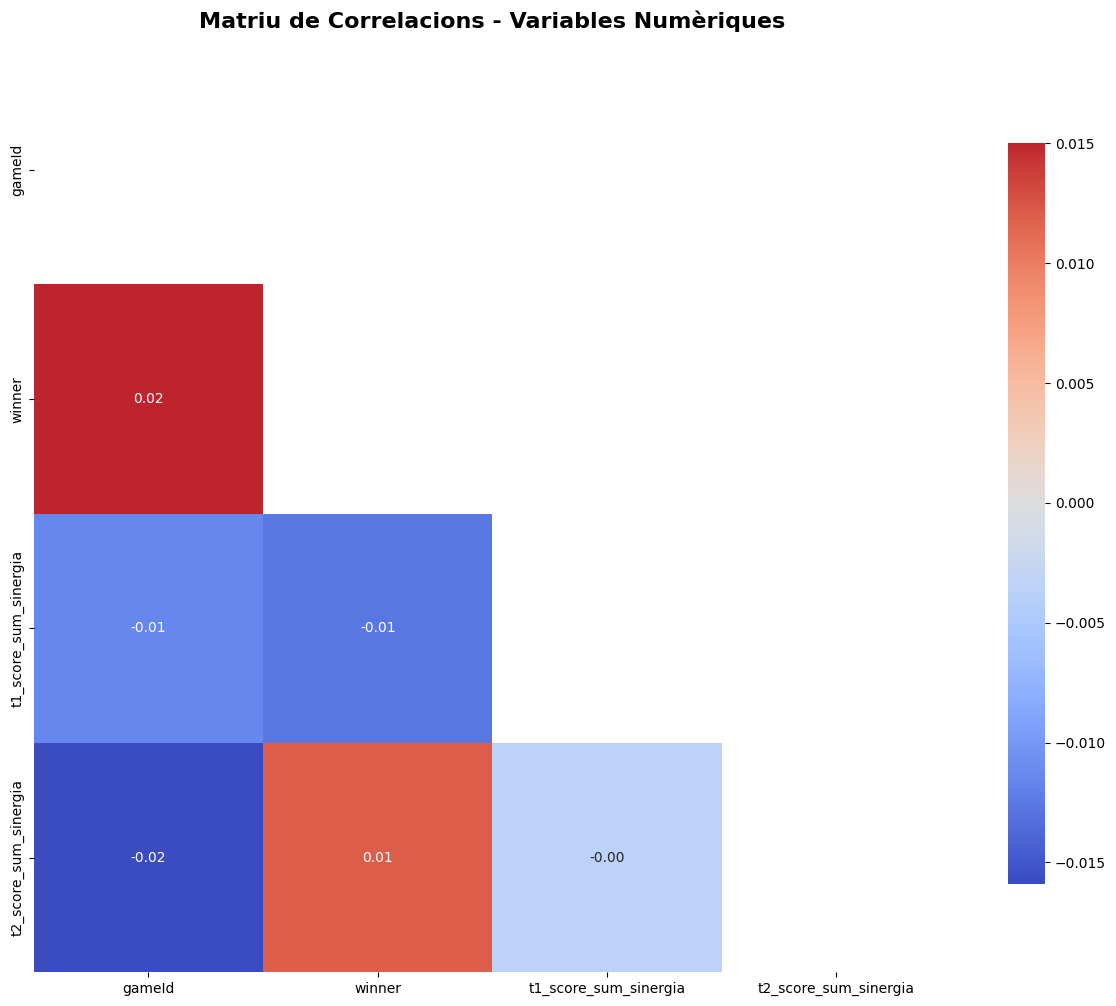


CORRELACIONS AMB EL TARGET: winner
             Variable  Correlació
               gameId    0.015016
t2_score_sum_sinergia    0.012048
t1_score_sum_sinergia   -0.012741


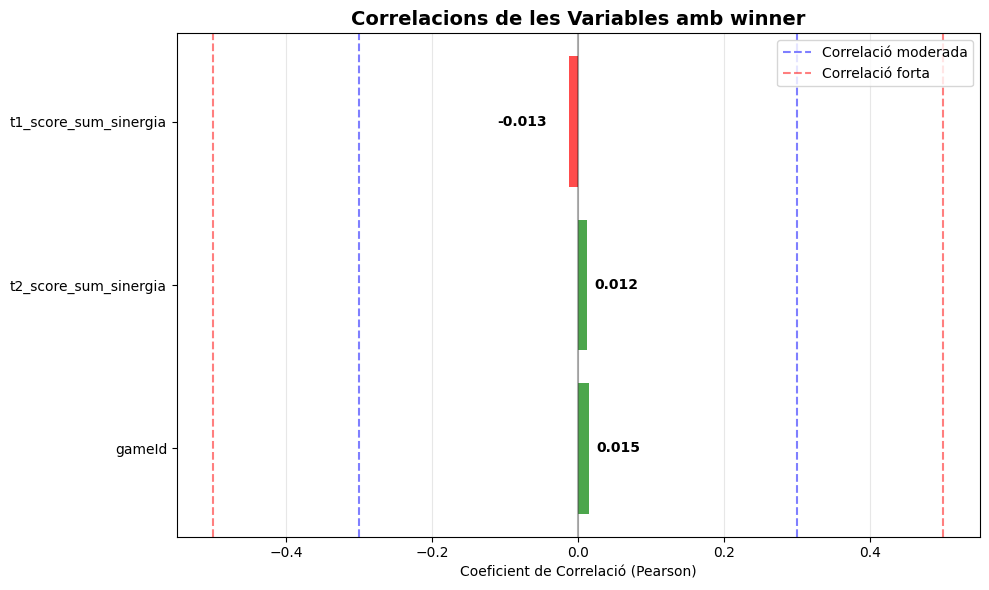


CORRELACIONS FORTES ENTRE VARIABLES (multicol·linealitat)
No s'han trobat correlacions fortes (> |0.5|) entre variables

RESUM - VARIABLES MÉS RELLEVANTS PER AL MODEL
Cap variable mostra correlació forta amb el target (|r| > 0.3)

Variables amb baixa correlació amb el target (|r| < 0.05):
  - gameId: 0.015
  - t2_score_sum_sinergia: 0.012
  - t1_score_sum_sinergia: -0.013


,gameId,winner,t1_score_sum_sinergia,t2_score_sum_sinergia
gameId,1.000000,0.015016,-0.011485,-0.015916
winner,0.015016,1.000000,-0.012741,0.012048
t1_score_sum_sinergia,-0.011485,-0.012741,1.000000,-0.003474
t2_score_sum_sinergia,-0.015916,0.012048,-0.003474,1.000000


In [19]:
crear_matriu_correlacio(data_set, target_attribute='winner', figsize=(12, 10))